In [1]:
from pathlib import Path
import pandas as pd
from pandas.plotting import scatter_matrix
import tarfile
import urllib.request

import matplotlib.pyplot as plt
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit

데이터호출

In [2]:
def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))


housing = load_housing_data()
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


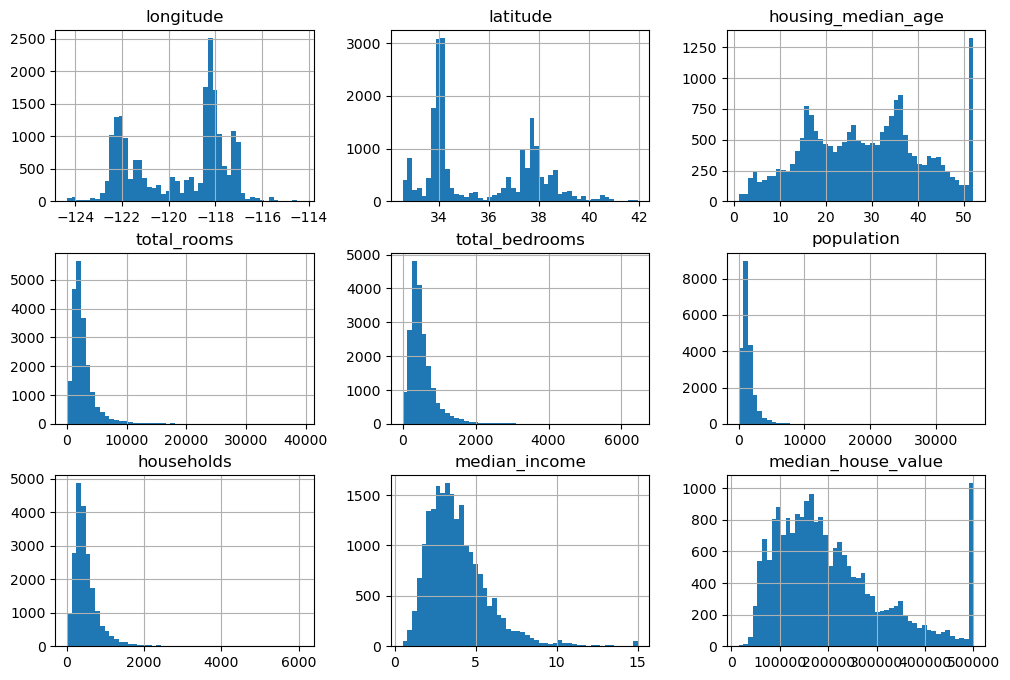

In [5]:
housing.hist(bins=50, figsize=(12, 8))
plt.show()

Split 함수로 구현

In [6]:
def shuffle_split(data, test_ratio):
    indices = np.random.permutation(len(data))
    test_set_size = int(len(data) * test_ratio)
    test_indices = indices[:test_set_size]
    train_indices = indices[test_set_size:]
    return data.iloc[train_indices], data.iloc[test_indices]

In [7]:
train_set, test_set = shuffle_split(housing, 0.2)
train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
18254,-121.84,37.21,15.0,5468.0,676.0,2221.0,675.0,8.3792,418300.0,<1H OCEAN
4009,-117.88,33.85,34.0,1127.0,185.0,588.0,181.0,4.3750,224700.0,<1H OCEAN
13490,-117.06,32.71,21.0,1864.0,388.0,1498.0,389.0,3.8194,125700.0,NEAR OCEAN
2474,-117.12,33.14,16.0,1710.0,272.0,1025.0,267.0,4.1641,163600.0,<1H OCEAN
20404,-122.41,37.61,46.0,2975.0,643.0,1479.0,577.0,3.8214,273600.0,NEAR OCEAN
...,...,...,...,...,...,...,...,...,...,...
5483,-121.29,37.97,52.0,1610.0,480.0,1025.0,440.0,1.2962,110200.0,INLAND
17312,-117.93,33.85,33.0,2489.0,546.0,1857.0,444.0,2.9474,178400.0,<1H OCEAN
5507,-118.19,34.03,31.0,525.0,136.0,627.0,145.0,2.6964,125000.0,<1H OCEAN
5817,-119.07,36.08,5.0,2693.0,508.0,1785.0,491.0,3.0000,71000.0,INLAND


In [8]:
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=12345)

In [9]:
housing["income_cat"] = pd.cut(
    housing["median_income"],
    bins=[0.0, 1.5, 3.0, 4.5, 6.0, np.inf],
    labels=[1, 2, 3, 4, 5],
)
housing

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,income_cat
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY,5
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY,5
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY,5
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY,3
...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND,2
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND,2
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND,2
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND,2


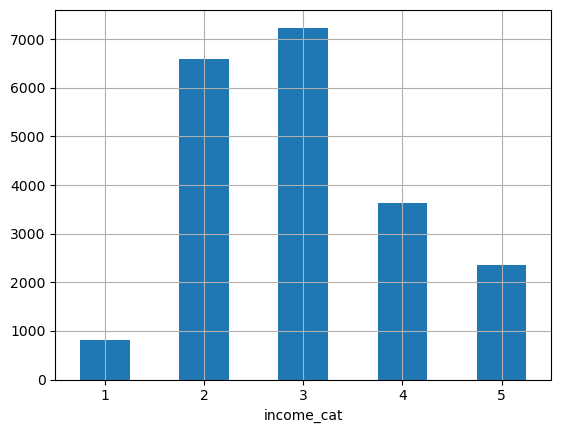

In [10]:
housing["income_cat"].value_counts().sort_index().plot.bar(rot=0, grid=True)
plt.show()

In [11]:
splitter = StratifiedShuffleSplit(n_splits=10, test_size=0.2, random_state=12345)
strat_splits = []
for train_index, test_index in splitter.split(housing, housing["income_cat"]):
    strat_train_set_n = housing.iloc[train_index]
    strat_test_set_n = housing.iloc[test_index]
    strat_splits.append([strat_train_set_n, strat_test_set_n])

In [12]:
strat_train_set, strat_test_set = train_test_split(
    housing, test_size=0.2, stratify=housing["income_cat"], random_state=12345
)

In [13]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_cat", axis=1, inplace=True)

In [14]:
strat_train_set

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
11613,-121.34,38.62,20.0,4021.0,864.0,1658.0,730.0,2.4537,153000.0,INLAND
19270,-117.25,32.84,19.0,1759.0,214.0,659.0,195.0,10.7751,500001.0,NEAR OCEAN
6475,-118.18,34.08,31.0,1318.0,311.0,1164.0,289.0,2.9939,135500.0,<1H OCEAN
4751,-118.15,33.96,33.0,1201.0,340.0,1482.0,334.0,2.4821,150000.0,<1H OCEAN
848,-121.25,37.94,30.0,1509.0,308.0,967.0,278.0,1.7798,65900.0,INLAND
...,...,...,...,...,...,...,...,...,...,...
20046,-122.38,40.67,10.0,2281.0,444.0,1274.0,438.0,2.2120,65600.0,INLAND
9233,-122.44,37.71,46.0,1230.0,247.0,895.0,257.0,5.3913,248900.0,NEAR BAY
6107,-118.08,34.12,41.0,1598.0,280.0,807.0,282.0,5.5067,325000.0,<1H OCEAN
5037,-118.18,33.82,52.0,2618.0,472.0,943.0,440.0,3.7895,254000.0,NEAR OCEAN


탐색과 시각화

In [15]:
housing = strat_train_set.copy()

c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\user\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


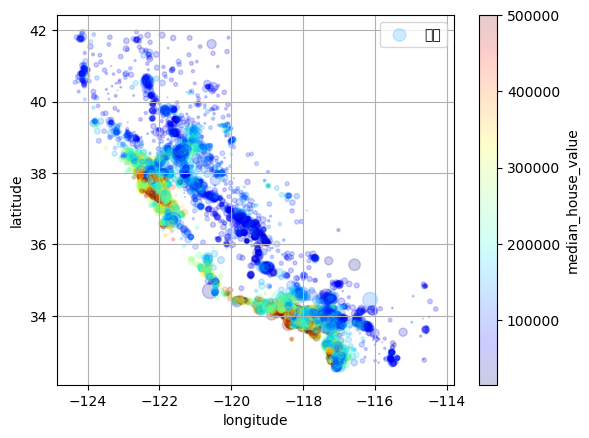

In [16]:
# 지리적 위치 시각화
housing.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    grid=True,
    s=housing["population"] / 100,
    label="인구",
    c="median_house_value",
    cmap="jet",
    colorbar=True,
    alpha=0.2,
)

plt.show()

상관관계

In [17]:
corr_matrix = housing.corr(numeric_only=True)
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688711
total_rooms           0.139847
housing_median_age    0.101723
households            0.069114
total_bedrooms        0.052148
population           -0.020053
longitude            -0.045092
latitude             -0.145167
Name: median_house_value, dtype: float64

scatter_matrix

array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='total_rooms'>,
        <Axes: xlabel='median_income', ylabel='total_rooms'>,
        <Axes: xlabel='total_rooms', ylabel='total_rooms'>,
        <Axes: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<Axes: xlabel='median_house_value', ylabel='housing_median_age'>,
        <Axes: xlabel='median_income', ylabel='housing_median_age'>,
        <Axes: xlabel='total_rooms', ylabel='housi

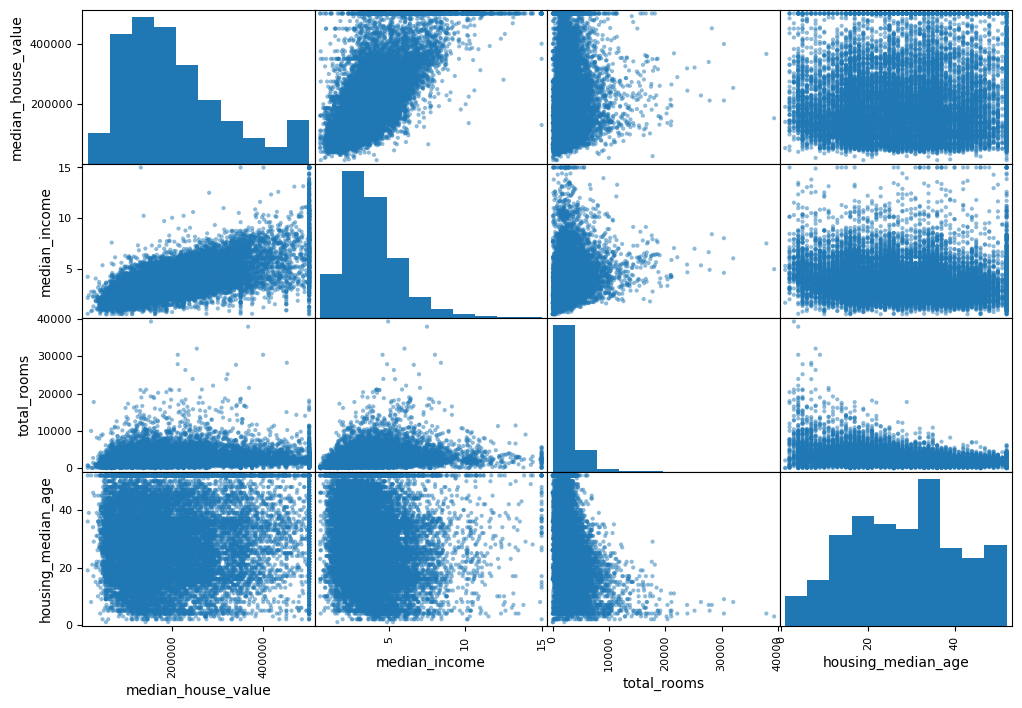

In [18]:
attributes = [
    "median_house_value",
    "median_income",
    "total_rooms",
    "housing_median_age",
]
scatter_matrix(housing[attributes], figsize=(12, 8))

In [19]:
housing["room_per_house"] = housing["total_rooms"] / housing["households"]
housing["bedrooms_ratio"] = housing["total_bedrooms"] / housing["total_rooms"]
housing["population_per_house"] = housing["population"] / housing["households"]

데이터준비

In [20]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_test_set["median_house_value"].copy()